<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описательные-статистики" data-toc-modified-id="Описательные-статистики-1">Описательные статистики</a></span></li><li><span><a href="#1.-Данные" data-toc-modified-id="1.-Данные-2">1. Данные</a></span></li><li><span><a href="#2.-Описательные-статистики" data-toc-modified-id="2.-Описательные-статистики-3">2. Описательные статистики</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#2.1-Максимальное-и-минимальное-значения" data-toc-modified-id="2.1-Максимальное-и-минимальное-значения-3.0.1">2.1 Максимальное и минимальное значения</a></span></li><li><span><a href="#2.2-Меры-центральной-тенденции-(среднего-уровня)" data-toc-modified-id="2.2-Меры-центральной-тенденции-(среднего-уровня)-3.0.2">2.2 Меры центральной тенденции (среднего уровня)</a></span></li><li><span><a href="#2.3-Меры-разброса" data-toc-modified-id="2.3-Меры-разброса-3.0.3">2.3 Меры разброса</a></span></li><li><span><a href="#2.4-Квантили" data-toc-modified-id="2.4-Квантили-3.0.4">2.4 Квантили</a></span></li><li><span><a href="#2.5-Хочу-всё-и-сразу" data-toc-modified-id="2.5-Хочу-всё-и-сразу-3.0.5">2.5 Хочу всё и сразу</a></span></li></ul></li></ul></li><li><span><a href="#3.-Группировка" data-toc-modified-id="3.-Группировка-4">3. Группировка</a></span></li><li><span><a href="#4.-Apply" data-toc-modified-id="4.-Apply-5">4. Apply</a></span></li><li><span><a href="#5.-Гистограммы" data-toc-modified-id="5.-Гистограммы-6">5. Гистограммы</a></span></li><li><span><a href="#6.-Усытые-ящики" data-toc-modified-id="6.-Усытые-ящики-7">6. Усытые ящики</a></span></li></ul></div>



#  Описательные статистики

В этой тетрадке мы поговорим про описательные статистики и простые визуализации.

In [ ]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')    # стиль графиков

Опция `matplotlib inline` - позволяет рисовать графики прямо в ноутбуке.

In [ ]:
%matplotlib inline

# 1. Данные

In [1]:
df = pd.read_csv("./youtube_data_short.csv", sep = "\t")

NameError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19124 entries, 0 to 19123
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 19124 non-null  object 
 1   commentCount          18914 non-null  float64
 2   dislikeCount          18850 non-null  float64
 3   likeCount             18850 non-null  float64
 4   music_style           19124 non-null  object 
 5   performer             19124 non-null  object 
 6   viewCount             19123 non-null  float64
 7   commentators_uniq     12314 non-null  float64
 8   comments_obscene_cnt  12314 non-null  float64
 9   video_age             19124 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 1.5+ MB


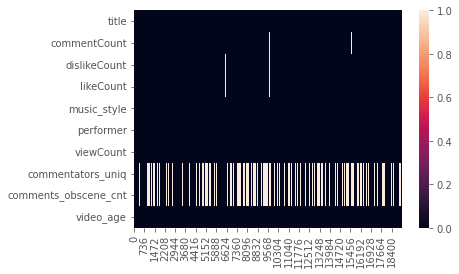

In [ ]:
sns.heatmap(df.isna().T);

In [ ]:
print(df.shape)

(19124, 10)


In [ ]:
df[105:112]

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
105,"""Первая четверть"" Юбилейный концерт в Олимпийс...",11.0,0.0,125.0,rock,арбенина,2225.0,NaN,NaN,8
106,"""Первая четверть"" юбилейный концерт Дианы Арбе...",43.0,3.0,399.0,rock,арбенина,3177.0,NaN,NaN,0
107,"""Перелётная птица"" [Москва, 2012г.]",2.0,3.0,56.0,shanson,ирина_круг,8325.0,2.0,0.0,1984
108,"""Пока ещё не поздно"". Михаил Круг. Жизнь и люб...",7.0,7.0,108.0,shanson,ирина_круг,29928.0,5.0,0.0,2148
109,"""Пока ещё не поздно"". Михаил Круг. Любовь и см...",15.0,11.0,158.0,shanson,ирина_круг,27185.0,9.0,0.0,2148
110,"""Последний герой"" с Дианой Арбениной - пре...",1.0,1.0,31.0,rock,арбенина,1953.0,1.0,0.0,892
111,"""Последний герой: Павел Кашин (тизер программы...",0.0,1.0,9.0,rock,арбенина,954.0,NaN,NaN,757


In [ ]:
df.dtypes

title                    object
commentCount            float64
dislikeCount            float64
likeCount               float64
music_style              object
performer                object
viewCount               float64
commentators_uniq       float64
comments_obscene_cnt    float64
video_age                 int64
dtype: object

__Описание колонок:__

- `title` - название видео
- `commentCount` - число комментариев
- `dislikeCount` - число дизлайков
- `likeCount`  - число лайков
- `music_style` - музыкальный стиль
- `performer` - исполнитель
- `viewCount` - число просмотров
- `commentators_uniq` - число уникальных комментаторов
- `comments_obscene_cnt` - число комментариев
- `video_age` - возраст видео в днях

Возраст видео посчитан в днях относительно `2019-03-15` (момент, когда данные собирались).

# 2. Описательные статистики

In [ ]:
df['likeCount'].isna().sum()

274

In [ ]:
np.mean(df['likeCount'])

5735.014482758621

In [ ]:
# nanmean - среднее без учета пропусков и бесконечностей в столбце
np.nanmean(df['likeCount'])

5735.014482758621

### 2.1 Максимальное и минимальное значения

Посмотрим, какое в таблице есть максимальное и минимальное количество лайков под видео.

In [ ]:
df['likeCount'].max()

1686810.0

In [ ]:
df['likeCount'].min()

0.0

In [ ]:
df['likeCount'].describe().round()

count     18850.00
mean       5735.00
std       38903.00
min           0.00
25%          18.00
50%         100.00
75%         637.00
max     1686810.00
Name: likeCount, dtype: float64

Обратите внимание, что мы можем обращаться к столбцам ещё и через точку (только если имя столбца не содержит пробелов / точек / запятых / и т.д.). Давайте посмотрим кто накопил такое большое число лайков под своим клипом.

In [ ]:
mx = df['likeCount'].max()
mx

1686810.0

In [ ]:
df[df['likeCount'] == mx]

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
18649,Элджей & Feduk - Розовое вино,191702.0,151772.0,1686810.0,rap,feduk,208753182.0,3702.0,183.0,485


### 2.2 Меры центральной тенденции (среднего уровня)

Меры центральной тенденции — показатели, представляющие собой ответ на вопрос: «На что похожа середина данных?». Середину можно описывать с помощью разных показателей! Давайте посмотрим на них.

**Среднее**

В случае со средним значением «серединой» будет среднее арифметическое. Среднее значение отражает типичный показатель в наборе данных. Если мы случайно выберем один из показателей, то, скорее всего, получим значение, близкое к среднему.

In [ ]:
df['likeCount'].mean()

5735.014482758621

**Медиана**

Чтобы найти медиану, данные нужно расположить в порядке возрастания. Медианой будет значение, которое совпадает с серединой набора данных. Если количество значений чётное, то берётся среднее двух значений, которые «окружают» середину.

In [ ]:
df['likeCount'].median()

100.0

Медиана сильно отличается от среднего это происходит из-за выбросов, характеризующихся очедь длинным хвостом распределения.

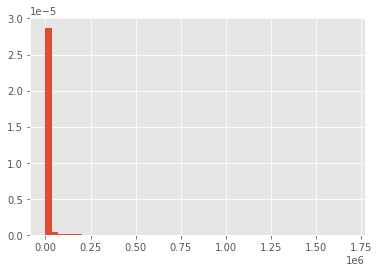

In [ ]:
df['likeCount'].hist(bins=50, density=True);

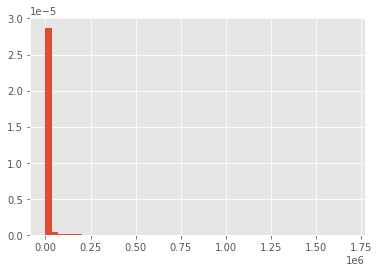

In [ ]:
plt.hist(df['likeCount'], bins=50, density=True);

Сделаем по вертикале логарифмическую шкалу, чтобы лучше разглядеть выбросы в хвосте.

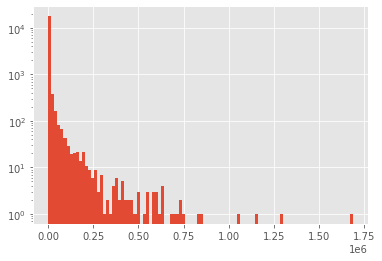

In [ ]:
# логарифмируем шкалу Y - частоты
# так делают редко
df.likeCount.hist(bins=100)#, density=True)
plt.yscale('log')
plt.show()

In [ ]:
np.log(0)

/var/folders/55/bhwblzw50zq_dtfl9p7kdbq00000gn/T/ipykernel_8812/2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

In [ ]:
np.log(1)

0.0

In [ ]:
df['likeCount_log'] = np.log10(1 + df['likeCount'])

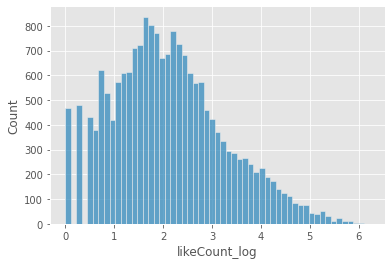

In [ ]:
sns.histplot(df['likeCount_log']);

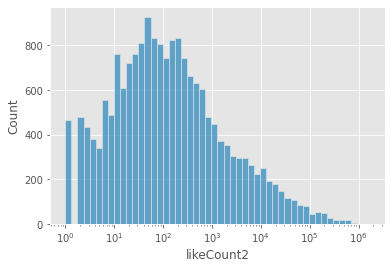

In [ ]:
sns.histplot(data=df.assign(likeCount2=df['likeCount']+1),
             x='likeCount2', bins=50, log_scale=True);

__Запомните на всю жизнь:__ выбросы - зло. Среднее значение чувствительно к выбросам, а медиана нет.

### 2.3 Меры разброса

Выше мы посмотрели на то насколько данные типичные. Кроме типичность интересно насколько в данных сильный разброс. Меры разброса отвечают на вопрос: «Как сильно мои данные могут отличаться от типичного значения?».

**Дисперсия и стандартное отклонение**

In [ ]:
df.likeCount.var()

1513445598.6358452

In [ ]:
df.likeCount.var(ddof=0) # дисперсия, variance

1513365309.7446709

In [ ]:
df.likeCount.var(ddof=1) # несмещённый вариант

1513445598.6358452

In [ ]:
df.likeCount.std(ddof=0) # стандартное отклонение, standard deviation

38901.99621799209

In [ ]:
df.likeCount.std(ddof=1) # несмещённый вариант

38903.02814223907

### 2.4 Квантили

In [ ]:
alpha = 0.99
df.likeCount.quantile(alpha)

128146.6499999979

Выходит, что у $99\%$ видео из выборки меньше $128146$ лайков, и у $1\%$ - больше. Выведем самых залайканные жанры из этого $1\%$.

In [ ]:
q = df.likeCount.quantile(alpha)
q

128146.6499999979

In [ ]:
print(*df[df.likeCount > q].sort_values(by='likeCount', ascending=False)['title'][:10].values,
      sep='\n')

Элджей & Feduk - Розовое вино
Miyagi & Эндшпиль feat. Рем Дигга - I Got Love (Official Video)
Егор Крид feat. Филипп Киркоров - Цвет настроения черный (премьера клипа, 2018)
Тимати feat. Егор Крид - Гучи (премьера клипа, 2018)
Four Seasons ~ Vivaldi
Ленинград — Экспонат
Let It Go (Disney's "Frozen") Vivaldi's Winter - The Piano Guys
Тимати feat. Егор Крид - Где ты, где я (премьера клипа, 2016)
The Best of Mozart
ЛСП - Тело


In [ ]:
x = df[df.likeCount > q].music_style
x.value_counts()

rap        108
popsa       36
rock        19
classic     18
indi         7
estrada      1
Name: music_style, dtype: int64

In [ ]:
df.likeCount.describe()

count     18850.00
mean       5735.01
std       38903.03
min           0.00
25%          18.00
50%         100.00
75%         636.75
max     1686810.00
Name: likeCount, dtype: float64

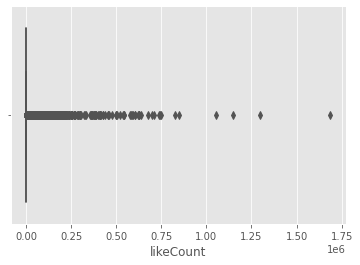

In [ ]:
# ничего не видно из-за тяжелого хвоста и большого кол-ва выбросов
sns.boxplot(x=df['likeCount']);

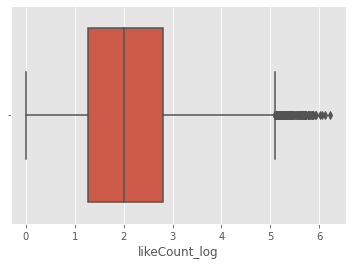

In [ ]:
sns.boxplot(x=df['likeCount_log']);

### 2.5 Хочу всё и сразу

**Метод describe** считает всё и сразу!

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
df.describe()

,commentCount,dislikeCount,likeCount,viewCount,commentators_uniq,comments_obscene_cnt,video_age,likeCount_log
count,18914.00,18850.00,18850.00,19123.00,12314.00,12314.00,19124.00,18850.00
mean,394.03,745.34,5735.01,843648.59,131.59,8.95,1389.77,2.11
std,4200.46,9339.78,38903.03,6382347.61,333.58,37.89,1054.26,1.15
min,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
25%,0.00,1.00,18.00,1915.00,4.00,0.00,378.00,1.28
50%,5.00,5.00,100.00,11353.00,13.00,0.00,1213.00,2.00
75%,35.00,38.00,636.75,81809.00,61.00,2.00,2218.00,2.80
max,303077.00,640698.00,1686810.00,272047706.00,3702.00,693.00,4574.00,6.23


Для каждой переменной мы видим:

* `count` - число наблюдений, которое есть без пропусков
* `mean` - среднее значение
* `std` - стандартное отклонение
* `min` -  минимум
* `max` -  максимум
* `50%` -  медиана (половина выборки больше неё, половина меньше)
* `25%` -  25% квантиль (четверть выборки меньше, 75% больше)
* `75%` -  75% квантиль

Можно построить такую же табличку только для категориальных переменных.


In [ ]:
df.dtypes

In [ ]:
df.describe(include='object')

* `count` -  число наблюдений, которое есть без пропусков
* `unique` - число уникальных значений (категорий), которые принимает переменная
* `top` - мода для каждой категории
* `freq` - частота, с которой встречается мода

# 3. Группировка

Если бы нас попросили посчитать, какое среднее число лайков ставят под видео разных жанров, мы могли бы узнать ответ с помощью срезов.

In [ ]:
df[df.music_style == 'rap'].likeCount.mean()

In [ ]:
df[df.music_style == 'popsa'].likeCount.mean()

Такой код надо продублировать для каждого жанра. Это не очень эффективно. Чтобы так не делать, придумали группировки. Их обычно делают с помощью метода `groupby`.

In [ ]:
df.groupby(['music_style'])[['likeCount', 'dislikeCount']].agg(['mean', 'median'])

В качестве аргумента в этой переменной нужно указать по каким переменным мы хотели бы осуществить группировку применяемой функции. В данной ситуации это жанр.

Можно делать `groupby` по нескольким колонкам, получать результаты по нескольким колонкам и даже применять несколько функций за раз!

In [ ]:
(df['commentators_uniq'] > 0).sum()

In [ ]:
df['is_comment'] = 1*(df['commentators_uniq'] > 0)  # есть ли под видео комментарии
df['is_comment'].value_counts()

In [ ]:
df.groupby(['music_style', 'is_comment'])[['dislikeCount', 'likeCount']]\
    .agg(['count','min','max','mean'])

# 4. Apply

Можно применить к каждому объекту ячейки одну и ту же функцию. Это можно сделать методом `apply`. Посчитаем число букв в названии каждого клипа из таблицы:

In [ ]:
name = 'NATASHA'
len(name)

In [ ]:
df.title.head()

In [ ]:
df.title.apply(len)[:10]

In [ ]:
df.title.apply(len).mean() # средняя длина названия

Можно написать свою функцию и применить её к колонке. Например, вот так можно достать первую букву каждого имени:

In [ ]:
def my_function(name):
    return name[0]

example = "Настя"

my_function(example)

In [ ]:
df.title.apply(my_function)[-10:]

Ровно то же самое можно сделать в одну строчку с помощью лямбда-функций. Это как обычная функция, но её нигде не надо объявлять.

In [ ]:
df.title.apply(lambda x: x[0])[-10:]

Преобразования можно делать сколь угодно сложными.

# 5. Гистограммы

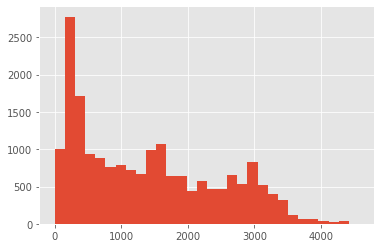

In [ ]:
df['video_age'].hist(bins=30);

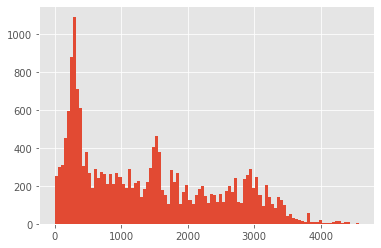

In [ ]:
plt.hist(df['video_age'], bins=100);

Можно сгладить распределение.

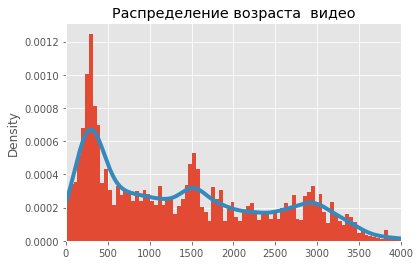

In [ ]:
df['video_age'].hist(bins=100, density=True)
df['video_age'].plot(kind='kde', linewidth=4)
plt.xlim(0, 4000)
plt.title("Распределение возраста  видео");

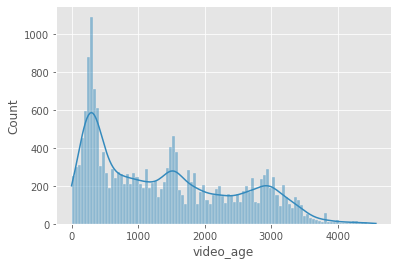

In [ ]:
sns.histplot(data=df, x='video_age', bins=100, kde=True);

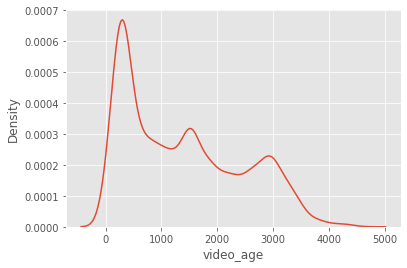

In [ ]:
sns.kdeplot(data=df, x='video_age');

In [ ]:
# sns.histplot sns.kdeplot
# plt.hist
# df['col'].plot(kind='kde')

Можно построить сразу много гистограмм.

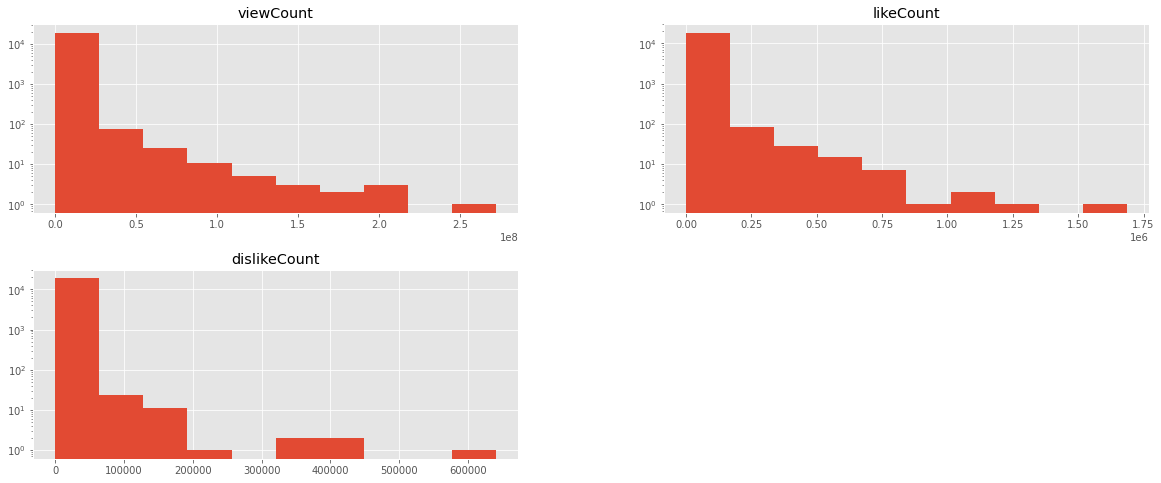

In [ ]:
columns = ['viewCount', 'likeCount', 'dislikeCount']
df[columns].hist(figsize=(20, 8), log=True);

Можно построить гистограммы для логарифмов показателей. Обычно логарифмирование используют для того, чтобы сгладить выборосы и сделать данные более гладкими. Более того, на основе логарифма можно придумать преобразование, которое нормализует данные.

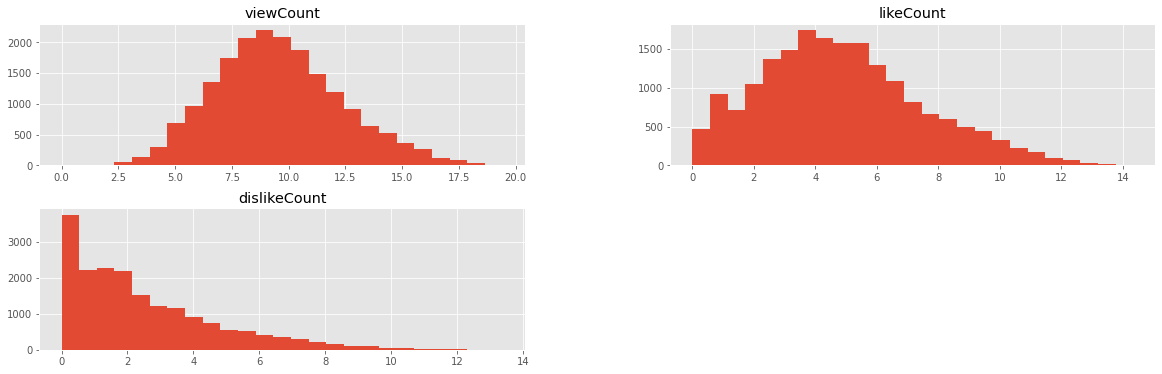

In [ ]:
df[columns].apply(lambda x: np.log(x + 1)).hist(figsize=(20, 6), bins=25);

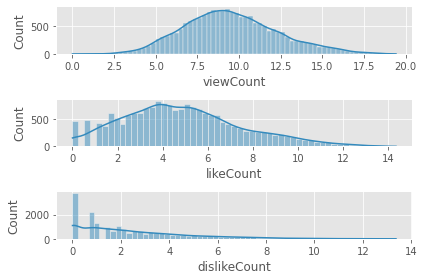

In [ ]:
for i, col in enumerate(columns):
    plt.subplot(3,1,i+1)
    sns.histplot(data=df[col].apply(lambda x: np.log(1+x)), kde=True)

plt.tight_layout();

# 6. Усытые ящики

In [ ]:
columns

['viewCount', 'likeCount', 'dislikeCount']

In [ ]:
df_log = df[columns].apply(lambda x: np.log(x + 1)) # снова прологарифмируем
df_log['music_style'] = df['music_style']
df_log.head()

,viewCount,likeCount,dislikeCount,music_style
0,12.28,7.25,3.78,popsa
1,14.61,9.26,6.54,popsa
2,10.60,5.60,2.40,popsa
3,9.38,5.10,2.08,popsa
4,11.42,6.39,3.00,popsa


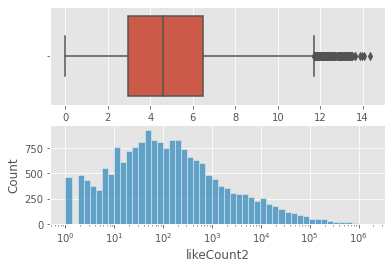

In [ ]:
plt.subplot(211)
sns.boxplot(data=df_log, x='likeCount')
plt.subplot(212)
sns.histplot(data=df.assign(likeCount2=df['likeCount']+1),
             x='likeCount2', bins=50, log_scale=True);

In [ ]:
order = df_log.groupby('music_style')['likeCount'].median().sort_values().index
order

Index(['shanson', 'indi', 'estrada', 'rock', 'popsa', 'classic', 'rap'], dtype='object', name='music_style')

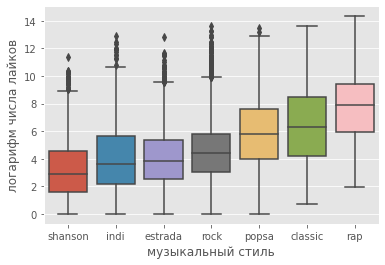

In [ ]:
sns.boxplot(x='music_style', y='likeCount', data=df_log, order=order)

plt.xlabel('музыкальный стиль')
plt.ylabel('логарифм числа лайков');

Можно построить похожую картинку под названием виолончель. Она отражает то же самое, что и ящики с усами, но выглядит более красиво.

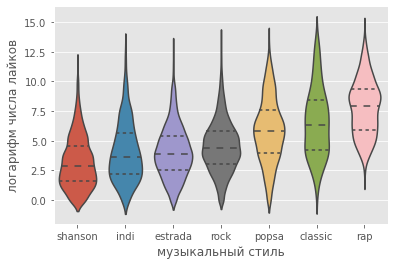

In [ ]:
sns.violinplot(x='music_style', y='likeCount',
               data=df_log, inner="quartile", order=order)

plt.xlabel('музыкальный стиль')
plt.ylabel('логарифм числа лайков');

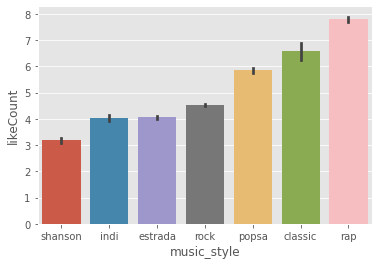

In [ ]:
sns.barplot(x='music_style', y='likeCount', data=df_log, order=order);